In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [1]:
def f(x):
    return 3*x**2 + 2*x + 1

f(3.0)

34.0

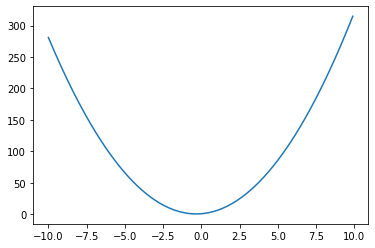

In [4]:
xs = np.arange(-10, 10, 0.1)
ys = f(xs)
plt.plot(xs, ys)

In [6]:
h = 0.001
x = -3.0
(f(x + h) - f(x))/h

-15.996999999998707

In [7]:
# This mimics the object-oriented approach in PyTorch and Jax
class Value:

    def __init__(self, data, grad, _children=(), _ops=''):
        self.data = data
        self.grad = grad
        self._prev = set(_children)
        self._op = _op
        self._backward = lambda: None

    def __repr__(self):
        return f"Value({self.data}, {self.grad})"

    def __add__(self, other):
        out = Value(self.data + other.data, self.grad +
                    other.grad, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, self.grad * other.data + self.data * other.grad, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

